In [77]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

Steps
1. read, understand and visualize the data
2. prepare the data for modeling
3. train the data
4. residual analysis
5. evaluate the model on test data

### step1 - read data

In [78]:
bike_sharing = pd.read_csv(r'C:\code\upgrad\5. Linear Regression\Multiple Linear Regression\Assignment\day.csv')
bike_sharing.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [79]:
bike_sharing.shape

(730, 16)

In [80]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [81]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


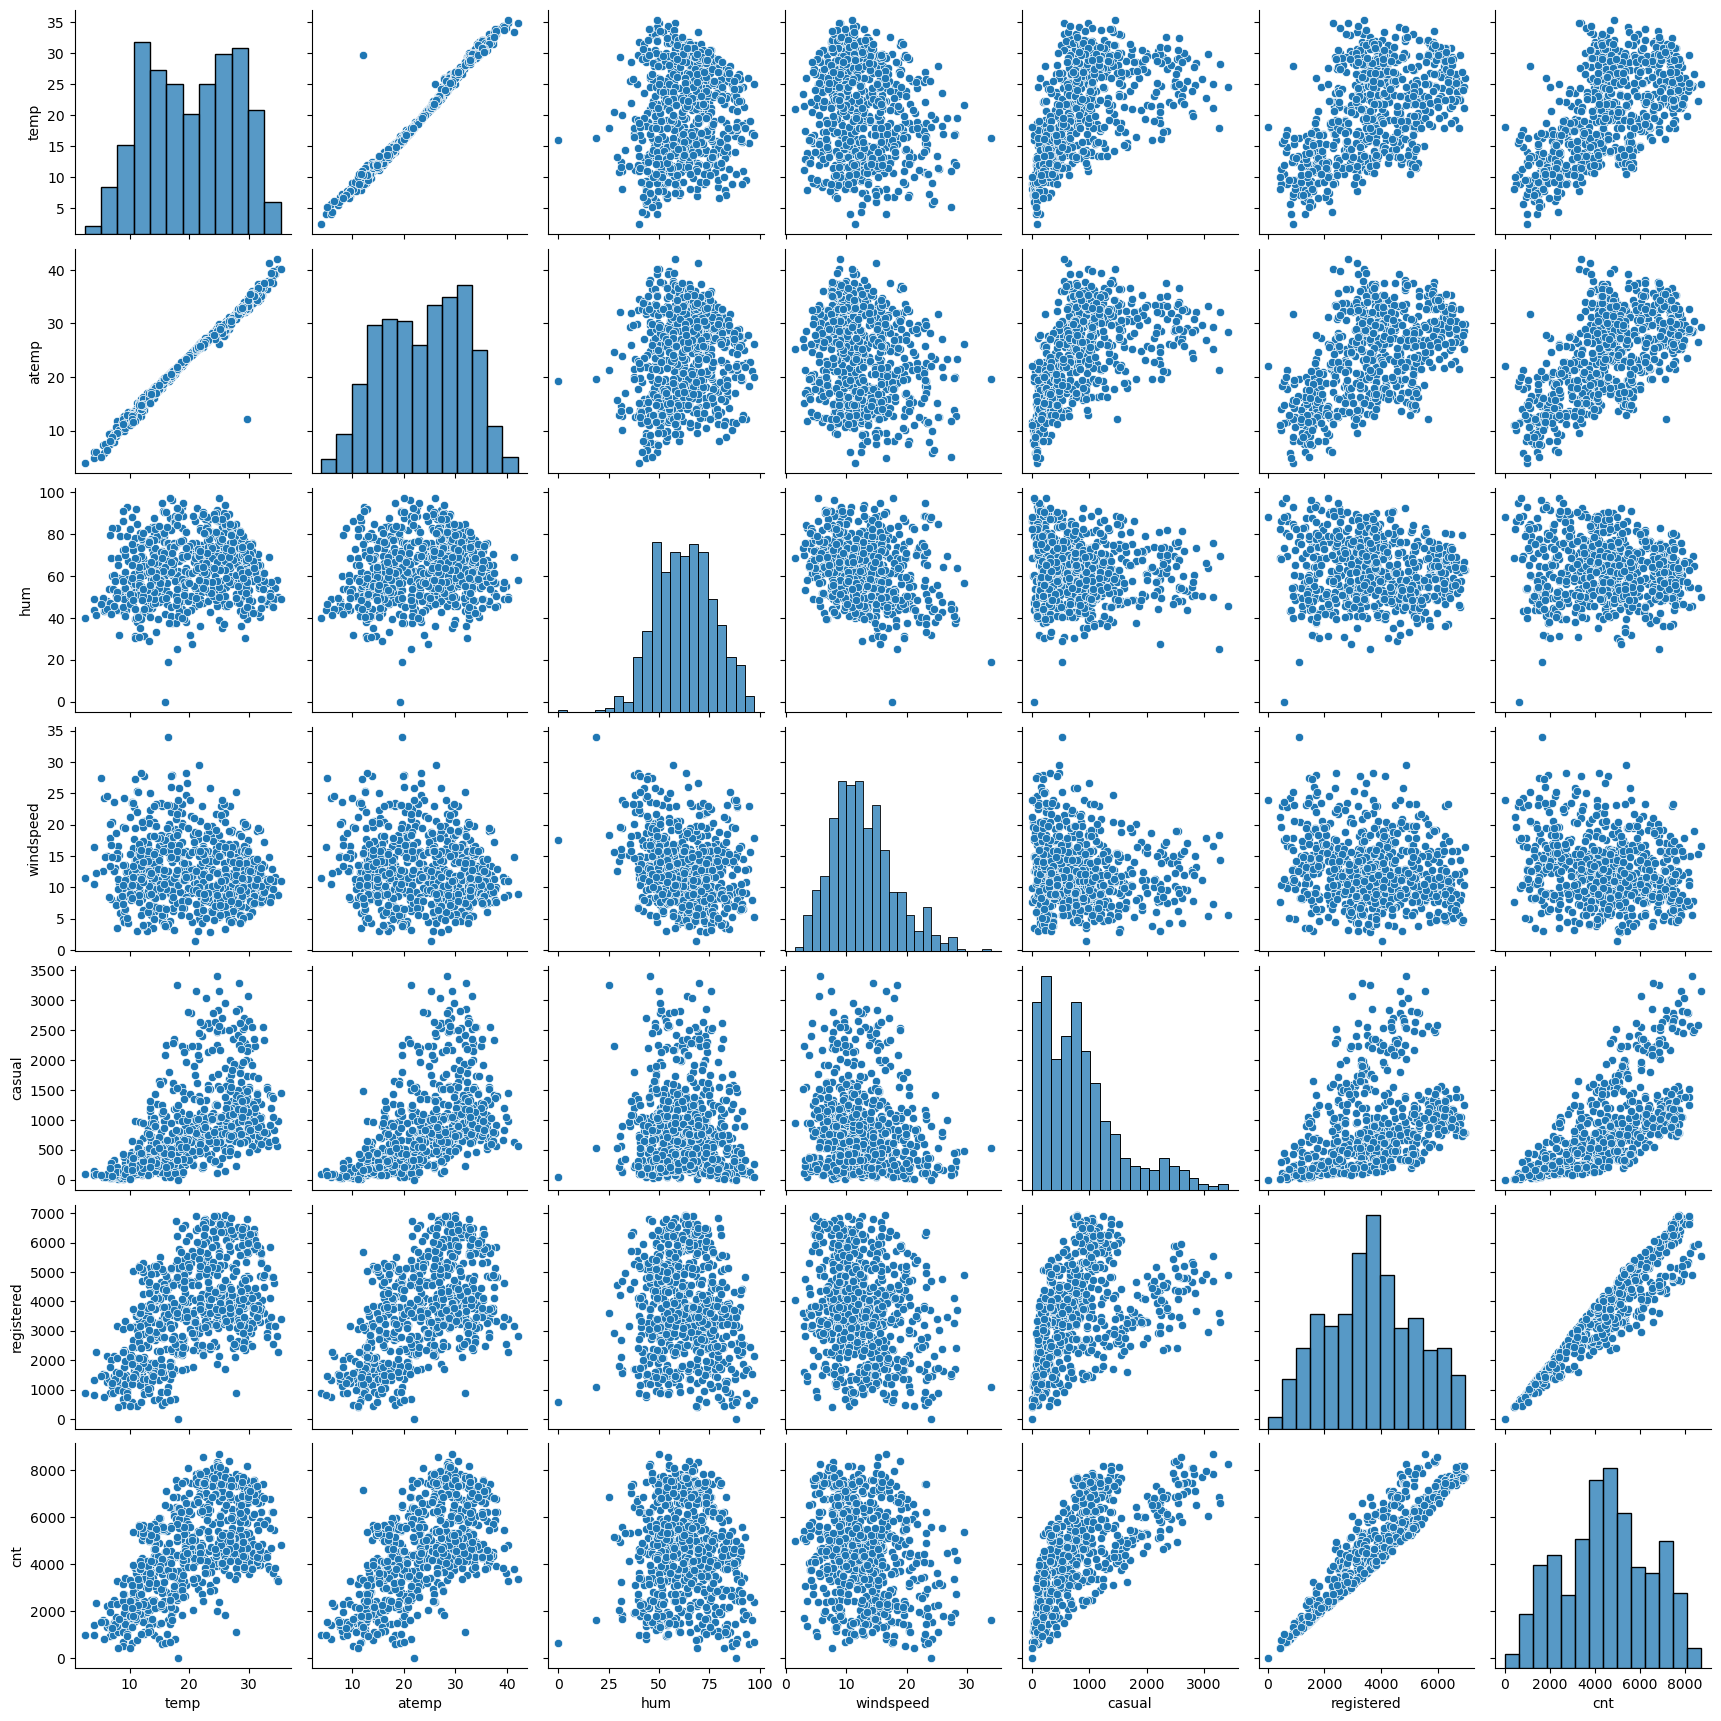

In [82]:
#visualize data and dependencies
sns.pairplot(bike_sharing.iloc[:, 9:])
plt.show()
# from the below temp has high correlation with # of rentals

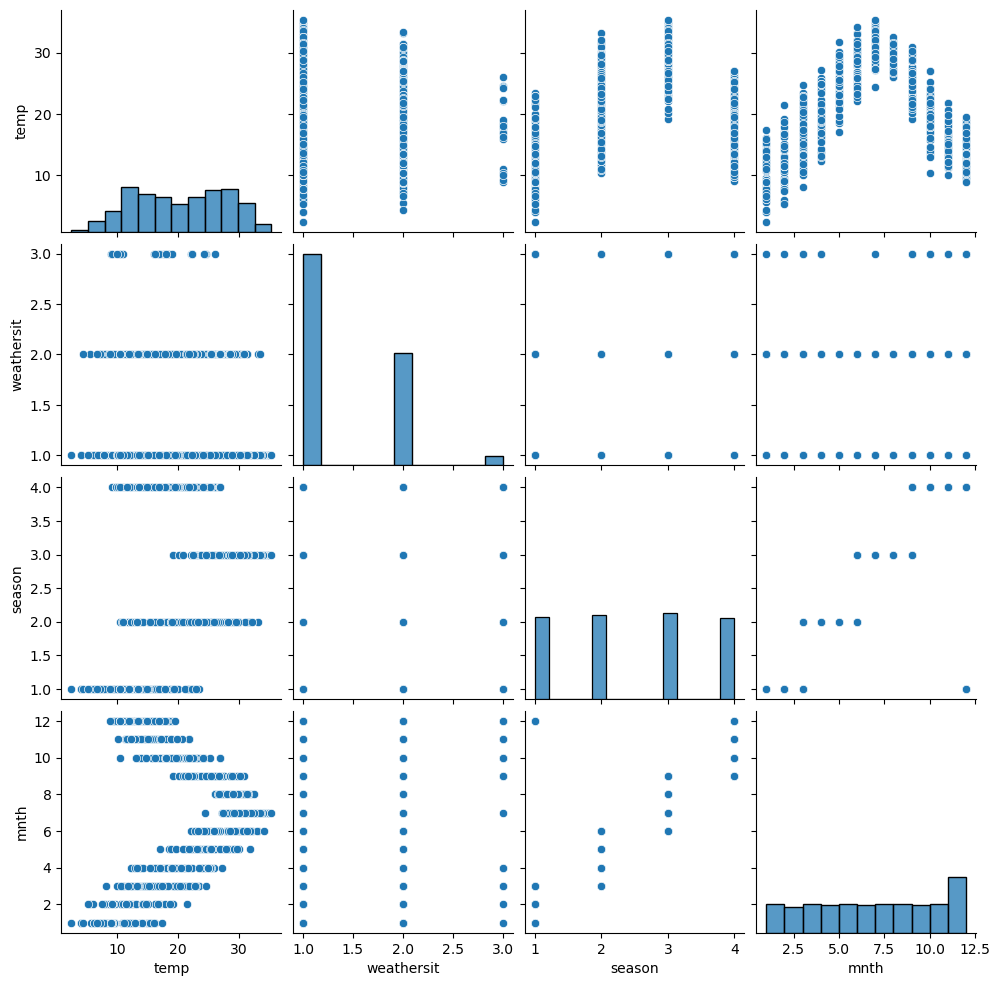

In [83]:
# looking how collinear independent variables are
sns.pairplot(bike_sharing[['temp', 'weathersit', 'season', 'mnth']])
plt.show()

In [84]:
# Define bins and labels
bins = range(0, 5)
labels = ['Clear/Partly Cloudy', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain']
# Create categorical column
bike_sharing['weathersit1'] = pd.cut(bike_sharing['weathersit'].astype('category'), bins=bins, labels=labels)

bins = range(-1, 7)
labels = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
bike_sharing['weekday1'] = pd.cut(bike_sharing['weekday'].astype('category'), bins=bins, labels=labels)

bins = range(0, 13)
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
bike_sharing['mnth1'] = pd.cut(bike_sharing['mnth'].astype('category'), bins=bins, labels=labels)

bike_sharing['season1'] = bike_sharing['season'].astype('category').map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

bike_sharing['yr1'] = bike_sharing['yr'].astype('category').map({0: 2018, 1: 2019})

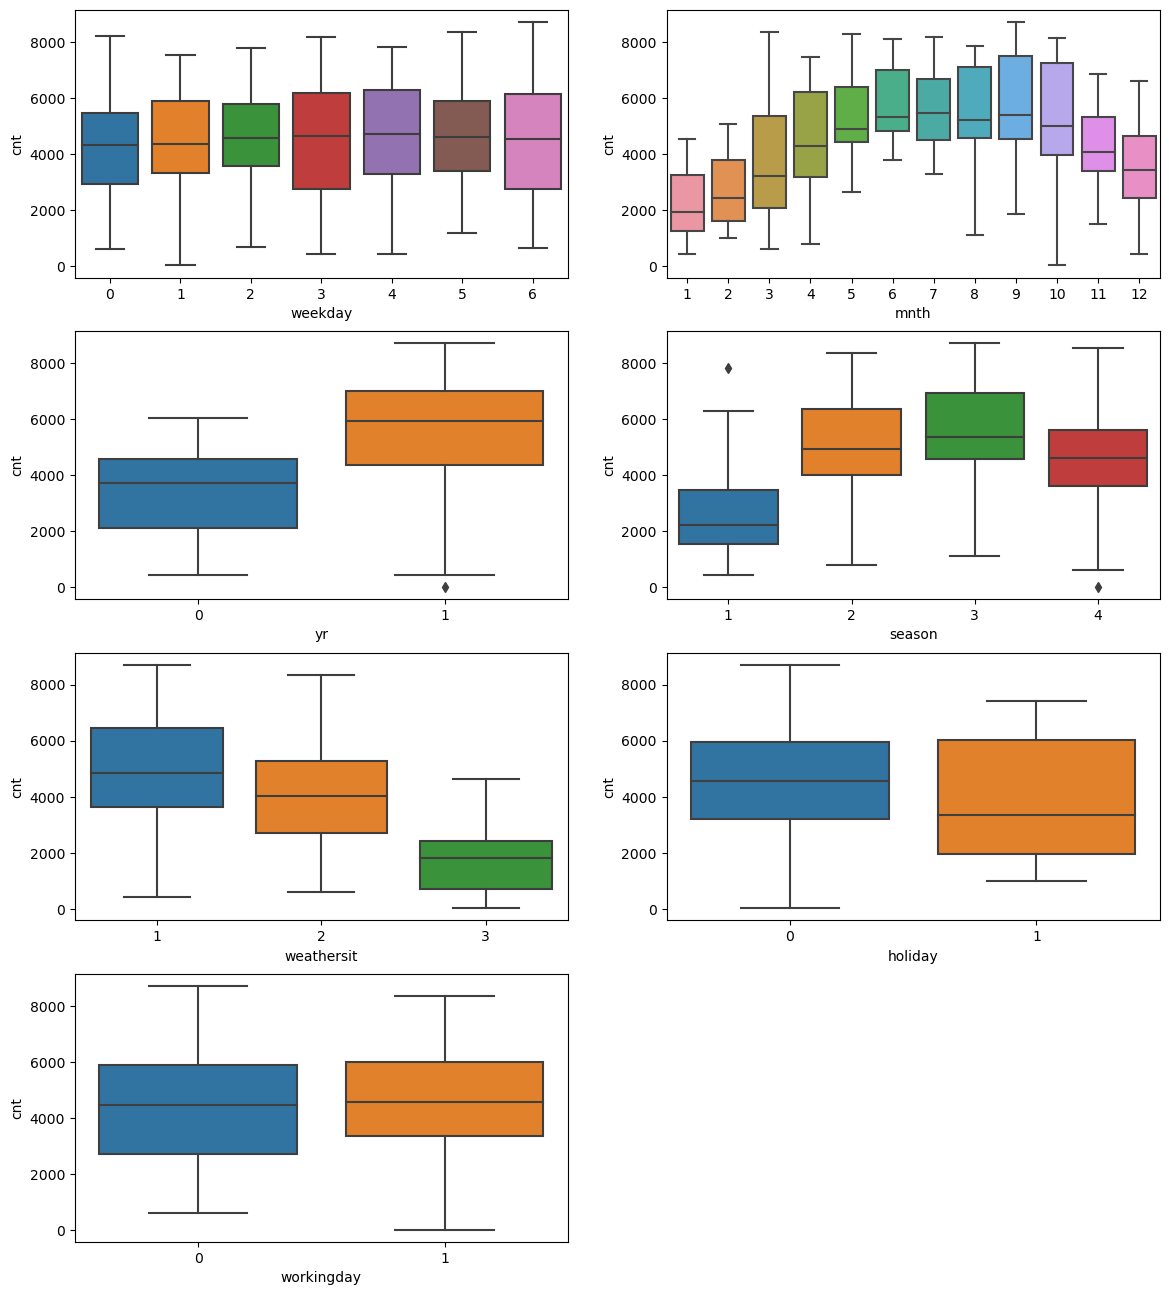

In [85]:
#cat_cols=['weekday1', 'mnth1', 'yr1', 'season1', 'weathersit1', 'holiday', 'workingday']
cat_cols=['weekday', 'mnth', 'yr', 'season', 'weathersit', 'holiday', 'workingday']
plt.figure(figsize=(14, 16))
for i, col in enumerate(cat_cols):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=col, y='cnt', data=bike_sharing)
plt.show()
# from the below season, weathersit, mnth, yr have impact on # of rentals

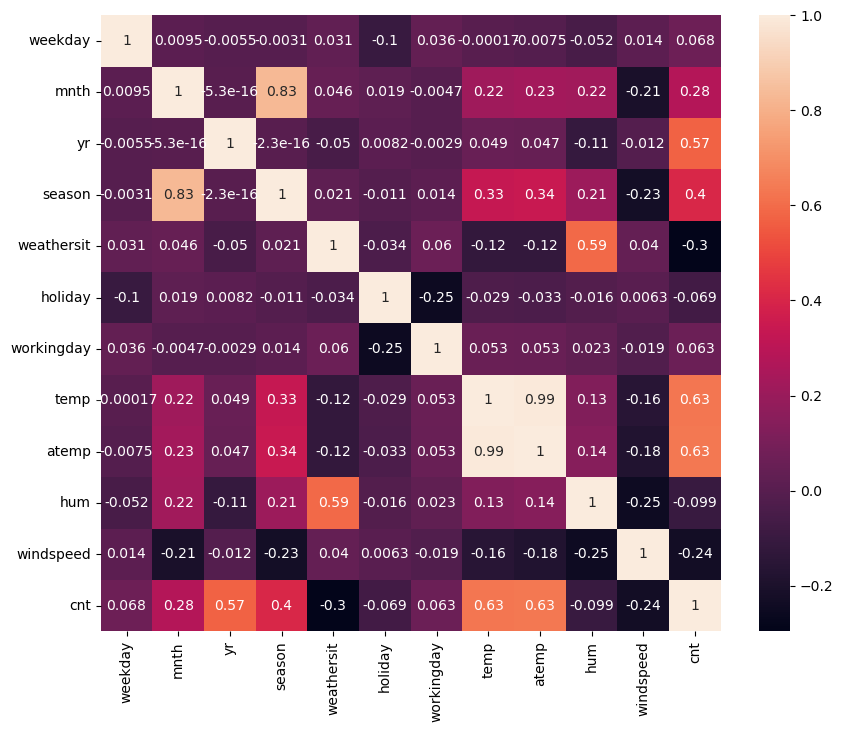

In [86]:
cols = ['weekday', 'mnth', 'yr', 'season', 'weathersit', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
plt.figure(figsize=(10, 8))
sns.heatmap(bike_sharing[cols].corr(), annot=True)
plt.show()
# windspeed seem to have reasonable correlation to cnt
# season and month are highly correlated

### step2 - prepare data
 - Encoding
     - map yes/no to 1/0
     - create dummy variables for categorical columns
 - train/test split
 - scaling numeric variable

In [87]:
#Encoding categorical columns
dummy_cols=['weathersit1', 'weekday1', 'mnth1', 'season1', 'yr1']
df = pd.get_dummies(bike_sharing[dummy_cols], drop_first=True)
bike_sharing = pd.concat([bike_sharing, df], axis=1)

#drop unneeded columns
drop_cols = ['weekday', 'mnth', 'yr', 'season', 'weathersit', 'weekday1', 'mnth1', 'yr1', 'season1', 'weathersit1']
for col in drop_cols:
    bike_sharing = bike_sharing.drop(col, axis=1)
bike_sharing.head(5)

,instant,dteday,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth1_Jul,mnth1_Aug,mnth1_Sep,mnth1_Oct,mnth1_Nov,mnth1_Dec,season1_Summer,season1_Fall,season1_Winter,yr1_2019
0,1,01-01-2018,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,False,False,False,False,False,False,False,False,False,False
1,2,02-01-2018,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,False,False,False,False,False,False,False,False,False,False
2,3,03-01-2018,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,False,False,False,False,False,False,False,False,False,False
3,4,04-01-2018,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,False,False,False,False,False,False,False,False,False,False
4,5,05-01-2018,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,False,False,False,False,False,False,False,False,False,False


In [88]:
#converting True to 1 and False to 0 in dummy column values
#this is required sm.OLS is throwing error for True, False
bike_sharing=bike_sharing.replace({True: 1, False: 0})
bike_sharing.head()

,instant,dteday,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth1_Jul,mnth1_Aug,mnth1_Sep,mnth1_Oct,mnth1_Nov,mnth1_Dec,season1_Summer,season1_Fall,season1_Winter,yr1_2019
0,1,01-01-2018,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,0,0,0,0,0,0
1,2,02-01-2018,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,0,0,0,0
2,3,03-01-2018,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,0,0,0
3,4,04-01-2018,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,0,0,0,0
4,5,05-01-2018,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,0


In [89]:
#drop unnecessary columns, since some of these columns also coming in way of sm.OLS
bike_sharing = bike_sharing.loc[:, ~bike_sharing.columns.isin(['instant', 'dteday', 'casual', 'registered'])]

#train test split
df_train, df_test = train_test_split(bike_sharing, train_size=0.7, random_state=1)
print(df_train.shape)
print(df_test.shape)

(510, 31)
(220, 31)


### scaling
-  normalization/min max scaling: x-xmin/xmax-xmin

In [90]:
scaler = MinMaxScaler()
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [91]:
#rescale numeric variables
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_train[num_cols].head()

,temp,atemp,hum,windspeed,cnt
135,0.656134,0.650070,0.743040,0.249252,0.452830
626,0.624490,0.636133,0.393272,0.459915,0.870801
554,0.824902,0.792844,0.597447,0.378326,0.753221
311,0.442008,0.459416,0.650812,0.111281,0.481247
312,0.431461,0.455049,0.701856,0.094959,0.470202


### build model

### RFE

In [92]:
y_train = df_train.pop('cnt')
X_train = df_train

In [93]:
X_train.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'weathersit1_Mist/Cloudy', 'weathersit1_Light Snow/Rain',
       'weathersit1_Heavy Rain', 'weekday1_Tue', 'weekday1_Wed',
       'weekday1_Thur', 'weekday1_Fri', 'weekday1_Sat', 'weekday1_Sun',
       'mnth1_Feb', 'mnth1_Mar', 'mnth1_Apr', 'mnth1_May', 'mnth1_Jun',
       'mnth1_Jul', 'mnth1_Aug', 'mnth1_Sep', 'mnth1_Oct', 'mnth1_Nov',
       'mnth1_Dec', 'season1_Summer', 'season1_Fall', 'season1_Winter',
       'yr1_2019'],
      dtype='object')

In [94]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [95]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weathersit1_Mist/Cloudy', False, 7),
 ('weathersit1_Light Snow/Rain', True, 1),
 ('weathersit1_Heavy Rain', False, 16),
 ('weekday1_Tue', True, 1),
 ('weekday1_Wed', True, 1),
 ('weekday1_Thur', True, 1),
 ('weekday1_Fri', True, 1),
 ('weekday1_Sat', True, 1),
 ('weekday1_Sun', False, 3),
 ('mnth1_Feb', False, 12),
 ('mnth1_Mar', False, 6),
 ('mnth1_Apr', False, 11),
 ('mnth1_May', False, 9),
 ('mnth1_Jun', False, 10),
 ('mnth1_Jul', False, 15),
 ('mnth1_Aug', False, 8),
 ('mnth1_Sep', True, 1),
 ('mnth1_Oct', False, 4),
 ('mnth1_Nov', False, 13),
 ('mnth1_Dec', False, 14),
 ('season1_Summer', False, 2),
 ('season1_Fall', False, 5),
 ('season1_Winter', True, 1),
 ('yr1_2019', True, 1)]

In [96]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [97]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_rfe_sm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     134.1
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.99e-158
Time:                        16:36:27   Log-Likelihood:                 451.32
No. Observations:                 510   AIC:                            -872.6
Df Residuals:                     495   BIC:                            -809.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,holiday,inf
1,workingday,inf
7,weekday1_Tue,inf
8,weekday1_Wed,inf
9,weekday1_Thur,inf
10,weekday1_Fri,inf
11,weekday1_Sat,inf
3,atemp,368.61
2,temp,362.56
4,hum,7.38


In [99]:
# after few trial and errors, arrived at following insignificant/multi-collinear variables, keeping an eye on optimal R squared score
X_train_rfe = X_train_rfe.drop(['weekday1_Thur', 'weekday1_Fri', 'weekday1_Sat', 'workingday', 'weekday1_Wed', 'weekday1_Tue', 'temp', 'hum', 'season1_Winter', 'mnth1_Sep', 'holiday'], axis=1)
X_train_rfe['weathersit1_Mist/Cloudy'] = X_train['weathersit1_Mist/Cloudy']

X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe_sm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     292.2
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.38e-146
Time:                        16:36:31   Log-Likelihood:                 398.64
No. Observations:                 510   AIC:                            -785.3
Df Residuals:                     504   BIC:                            -759.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [100]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,windspeed,3.34
0,atemp,3.33
3,yr1_2019,1.94
4,weathersit1_Mist/Cloudy,1.42
2,weathersit1_Light Snow/Rain,1.06


### Residual Analysis

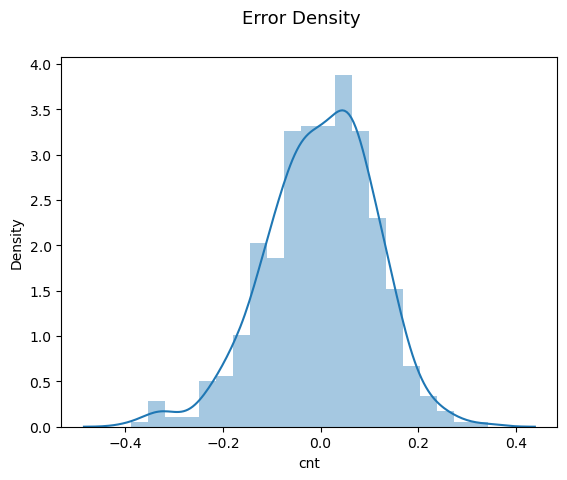

mean_squared_error = 0.012263038340853686


In [101]:
y_train_pred = lr.predict()

# find the error
res = y_train - y_train_pred

#plot the error
fig = plt.figure()
fig.suptitle("Error Density", fontsize=13)
sns.distplot(res)
plt.show()

print(f'mean_squared_error = {mean_squared_error(y_true=y_train, y_pred=y_train_pred)}')

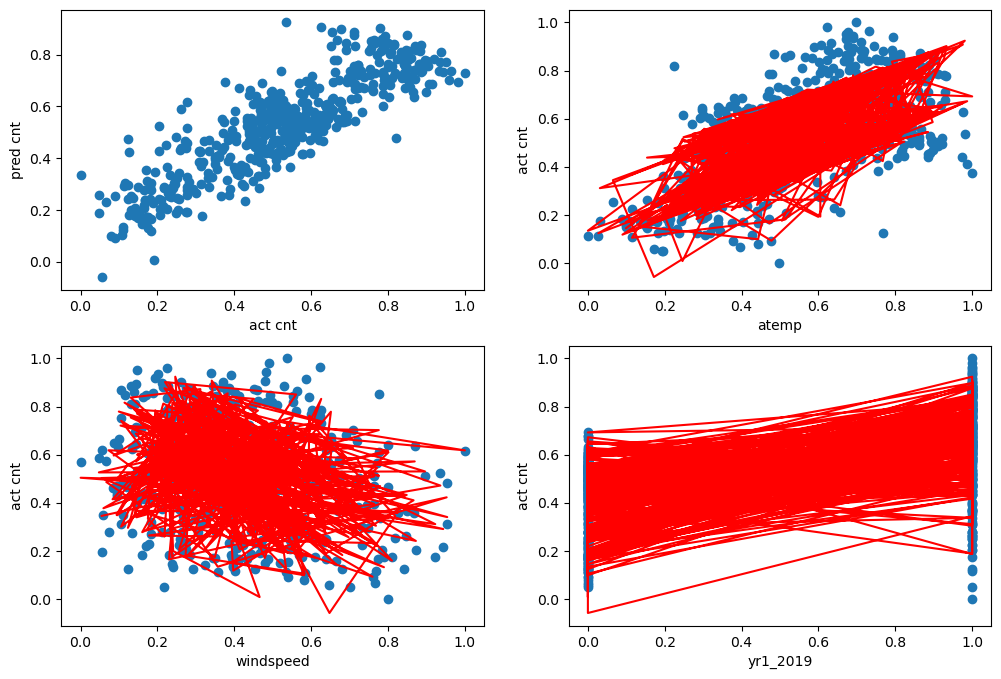

In [102]:
#fit prediction over significant columns to see if there are patterns in error
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(y_train, y_pred)
plt.xlabel("act cnt", fontsize=10)
plt.ylabel("pred cnt", fontsize=10)

plt.subplot(2, 2, 2)
plt.scatter(X_train['atemp'], y_train)
plt.plot(X_train['atemp'], y_train_pred, 'r')
plt.xlabel("atemp", fontsize=10)
plt.ylabel("act cnt", fontsize=10)

plt.subplot(2, 2, 3)
plt.scatter(X_train['windspeed'], y_train)
plt.plot(X_train['windspeed'], y_train_pred, 'r')
plt.xlabel("windspeed", fontsize=10)
plt.ylabel("act cnt", fontsize=10)

plt.subplot(2, 2, 4)
plt.scatter(X_train['yr1_2019'], y_train)
plt.plot(X_train['yr1_2019'], y_train_pred, 'r')
plt.xlabel("yr1_2019", fontsize=10)
plt.ylabel("act cnt", fontsize=10)

plt.show()

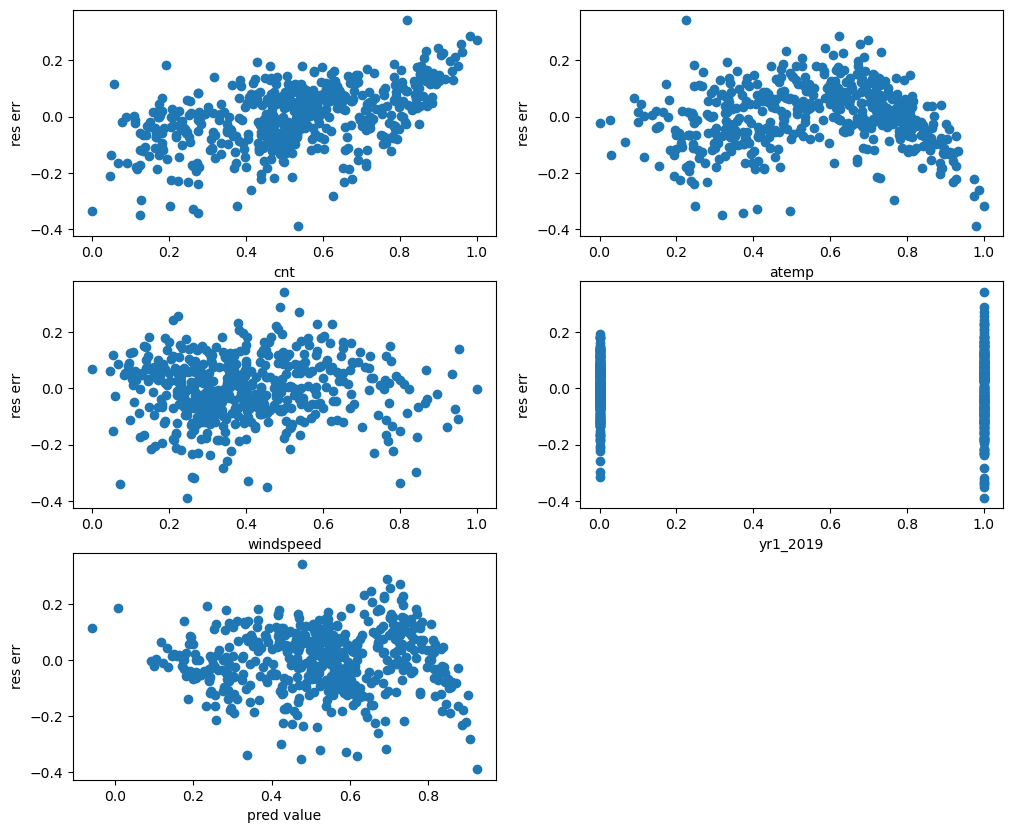

In [103]:
# plot error with X_train and y_train to see if there are patterns
plt.figure(figsize=(12,10))

plt.subplot(3, 2, 1)
plt.scatter(y_train, res)
plt.xlabel("cnt", fontsize=10)
plt.ylabel("res err", fontsize=10)

plt.subplot(3, 2, 2)
plt.scatter(X_train['atemp'], res)
plt.xlabel("atemp", fontsize=10)
plt.ylabel("res err", fontsize=10)

plt.subplot(3, 2, 3)
plt.scatter(X_train['windspeed'], res)
plt.xlabel("windspeed", fontsize=10)
plt.ylabel("res err", fontsize=10)

plt.subplot(3, 2, 4)
plt.scatter(X_train['yr1_2019'], res)
plt.xlabel("yr1_2019", fontsize=10)
plt.ylabel("res err", fontsize=10)

plt.subplot(3, 2, 5)
plt.scatter(y_train_pred, res)
plt.xlabel("pred value", fontsize=10)
plt.ylabel("res err", fontsize=10)

plt.show()

### Evaluate the model against test data

In [104]:
#scale test set
df_test[num_cols] = scaler.transform(df_test[num_cols])
df_test[num_cols].head()

,temp,atemp,hum,windspeed,cnt
248,0.608667,0.601379,0.880915,0.767112,0.309250
298,0.537996,0.542977,0.649072,0.301190,0.445467
159,0.948314,0.935594,0.437354,0.304151,0.447883
660,0.613942,0.622206,0.539443,0.172135,0.856420
511,0.798532,0.775430,0.616589,0.459906,0.755752


r2_score = 0.7542483453350967
mean_squared_error = 0.013010110796975451


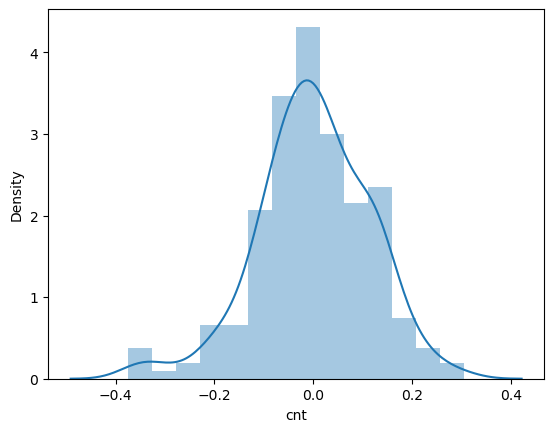

In [105]:
#evaluate on test set
y_test = df_test.pop('cnt')
X_test = df_test

X_test_sm = sm.add_constant(X_test[X_train_rfe.columns])
lr = sm.OLS(y_test, X_test_sm).fit()
y_test_pred = lr.predict()
res = y_test - y_test_pred
sns.distplot(res)

print(f'r2_score = {r2_score(y_true=y_test, y_pred=y_test_pred)}')
print(f'mean_squared_error = {mean_squared_error(y_true=y_test, y_pred=y_test_pred)}')

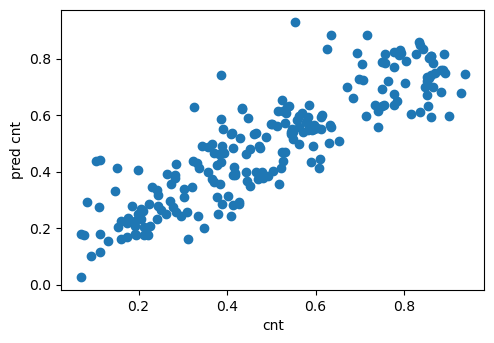

In [106]:
#fit prediction over significant columns to see if there are patterns in error
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_test_pred)
plt.xlabel("cnt", fontsize=10)
plt.ylabel("pred cnt", fontsize=10)
plt.show()

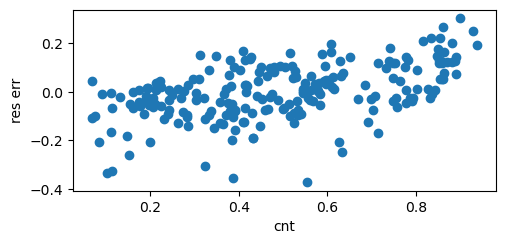

In [107]:
# plot error with y_test to see if there are patterns
plt.figure(figsize=(12,8))

plt.subplot(3, 2, 1)
plt.scatter(y_test, res)
plt.xlabel("cnt", fontsize=10)
plt.ylabel("res err", fontsize=10)

plt.show()